In [3]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.14.0
1.16.4
3.1.1


In [6]:
from tensorflow.examples .tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/")

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [43]:
training_digits, training_labels = mnist.train.next_batch(10000)
test_digits, test_labels = mnist.test.next_batch(200)

In [11]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation="nearest")

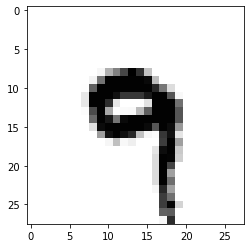

In [14]:
display_digit(test_digits[0])

In [15]:
test_digits[0].shape

(784,)

In [21]:
training_labels[:5]
print(training_digits.shape)
print(training_labels.shape)

(1000, 784)
(1000,)


In [25]:
tf.reset_default_graph()
training_digits_pl = tf.placeholder("float", [None, 784])
test_digit_pl = tf.placeholder('float', [784])
def get_majority_predicted_label(labels, indices):
    predicted_labels = []
    for i in indices:
        predicted_labels.append(labels[i])
        
    predicted_labes = np.array(predicted_labels)
    print(predicted_labels)
    counts = np.bincount(predicted_labels)
    return np.argmax(counts)


In [44]:
l1_distance = tf.abs(tf.subtract(training_digits_pl, test_digit_pl))
l2_distance = tf.square(tf.subtract(training_digits_pl, test_digit_pl))
distance_l1 = tf.reduce_sum(l1_distance, axis=1)
distance_l2 = tf.sqrt(tf.reduce_sum(l2_distance, axis=1))
pred_knn_l1 = tf.nn.top_k(tf.negative(distance_l1), k=5)
pred_knn_l2 = tf.nn.top_k(tf.negative(distance_l2), k=5)

In [45]:
accuracy = 0.
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(test_digits)):
        _, indices = sess.run(pred_knn_l2, feed_dict={training_digits_pl: training_digits, 
                                                     test_digit_pl: test_digits[i, :]})
        predicted_label = get_majority_predicted_label(training_labels, indices)
        
        print("Test", i, "Prediction:", predicted_label, "True label: ", test_labels[i])
        
        if predicted_label == test_labels[i]:
            accuracy += 1./len(test_digits)
        print("Done")
        print("Accuracy:", accuracy)

[6, 6, 6, 6, 6]
Test 0 Prediction: 6 True label:  6
Done
Accuracy: 0.005
[0, 0, 0, 0, 0]
Test 1 Prediction: 0 True label:  0
Done
Accuracy: 0.01
[2, 2, 2, 7, 2]
Test 2 Prediction: 2 True label:  2
Done
Accuracy: 0.015
[4, 4, 4, 4, 4]
Test 3 Prediction: 4 True label:  4
Done
Accuracy: 0.02
[7, 7, 7, 7, 7]
Test 4 Prediction: 7 True label:  7
Done
Accuracy: 0.025
[2, 2, 7, 7, 2]
Test 5 Prediction: 2 True label:  2
Done
Accuracy: 0.030000000000000002
[7, 7, 7, 7, 1]
Test 6 Prediction: 7 True label:  7
Done
Accuracy: 0.035
[0, 0, 0, 0, 0]
Test 7 Prediction: 0 True label:  9
Done
Accuracy: 0.035
[5, 5, 5, 5, 5]
Test 8 Prediction: 5 True label:  5
Done
Accuracy: 0.04
[3, 3, 3, 3, 3]
Test 9 Prediction: 3 True label:  3
Done
Accuracy: 0.045
[1, 1, 1, 1, 1]
Test 10 Prediction: 1 True label:  1
Done
Accuracy: 0.049999999999999996
[3, 3, 3, 3, 3]
Test 11 Prediction: 3 True label:  3
Done
Accuracy: 0.05499999999999999
[3, 3, 3, 3, 3]
Test 12 Prediction: 3 True label:  3
Done
Accuracy: 0.05999999999

[2, 2, 2, 2, 2]
Test 108 Prediction: 2 True label:  2
Done
Accuracy: 0.4850000000000003
[8, 8, 8, 8, 8]
Test 109 Prediction: 8 True label:  8
Done
Accuracy: 0.4900000000000003
[2, 2, 2, 2, 2]
Test 110 Prediction: 2 True label:  2
Done
Accuracy: 0.49500000000000033
[4, 4, 4, 4, 4]
Test 111 Prediction: 4 True label:  4
Done
Accuracy: 0.5000000000000003
[8, 8, 8, 8, 3]
Test 112 Prediction: 8 True label:  8
Done
Accuracy: 0.5050000000000003
[0, 0, 0, 0, 0]
Test 113 Prediction: 0 True label:  0
Done
Accuracy: 0.5100000000000003
[0, 0, 0, 0, 0]
Test 114 Prediction: 0 True label:  0
Done
Accuracy: 0.5150000000000003
[3, 5, 5, 5, 5]
Test 115 Prediction: 5 True label:  5
Done
Accuracy: 0.5200000000000004
[2, 2, 2, 2, 2]
Test 116 Prediction: 2 True label:  2
Done
Accuracy: 0.5250000000000004
[2, 2, 2, 2, 2]
Test 117 Prediction: 2 True label:  2
Done
Accuracy: 0.5300000000000004
[4, 4, 4, 4, 9]
Test 118 Prediction: 4 True label:  4
Done
Accuracy: 0.5350000000000004
[0, 0, 0, 0, 0]
Test 119 Predic